# **Hierarchical Clustering Analysis of Credit Card Customers**

### Throughout this analysis,
- Data Preprocessing:

  - Handle missing values.

  - Encode categorical variables.

  - Scale numerical features.

- Clustering Technique:

  - Apply hierarchical clustering to the cleaned dataset.

- Objective:

  - Discover distinct customer segments based on:

      - Credit card usage patterns.

      - Spending behaviors.

      - Demographic attributes.

- Purpose of Clustering:

  - Generate actionable business insights for the credit card industry.

- Applications of Insights:

  - Improve customer retention.

  - Enhance acquisition strategies.

  - Design personalized marketing campaigns.

  - Develop customized credit card products.

- Business Benefits:

  - Better understanding of customer needs and preferences.

  - Boost customer satisfaction and loyalty.

  - Support business growth.

## Importing libraries


In [27]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler


## Data Preprocessing

In [11]:
filename = '/content/BankChurners.csv'

In [12]:
df = pd.read_csv(filename)

In [13]:
print("Shape of dataset: ", df.shape)

Shape of dataset:  (10127, 23)


In [14]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [15]:
df=df.iloc[:,:-2]

In [16]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

- Dropping CLIENTNUM which is client number.

In [17]:
df = df.drop('CLIENTNUM', axis=1)

In [18]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   
6  Existing Customer            51      M                4         Unknown   
7  Existing Customer            32      M                0     High School   
8  Existing Customer            37      M                3      Uneducated   
9  Existing Customer            48      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   
6        Married         $120K +          Gold              46   
7        Unknown     $60K - $80K        Silver              27   
8         Single     $60K - $80K          Blue              36   
9         Single    $80K - $120K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36         

In [19]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

- Check the count of missing values in each column.

In [20]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- Compute summary statistics for numerical columns.

In [21]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

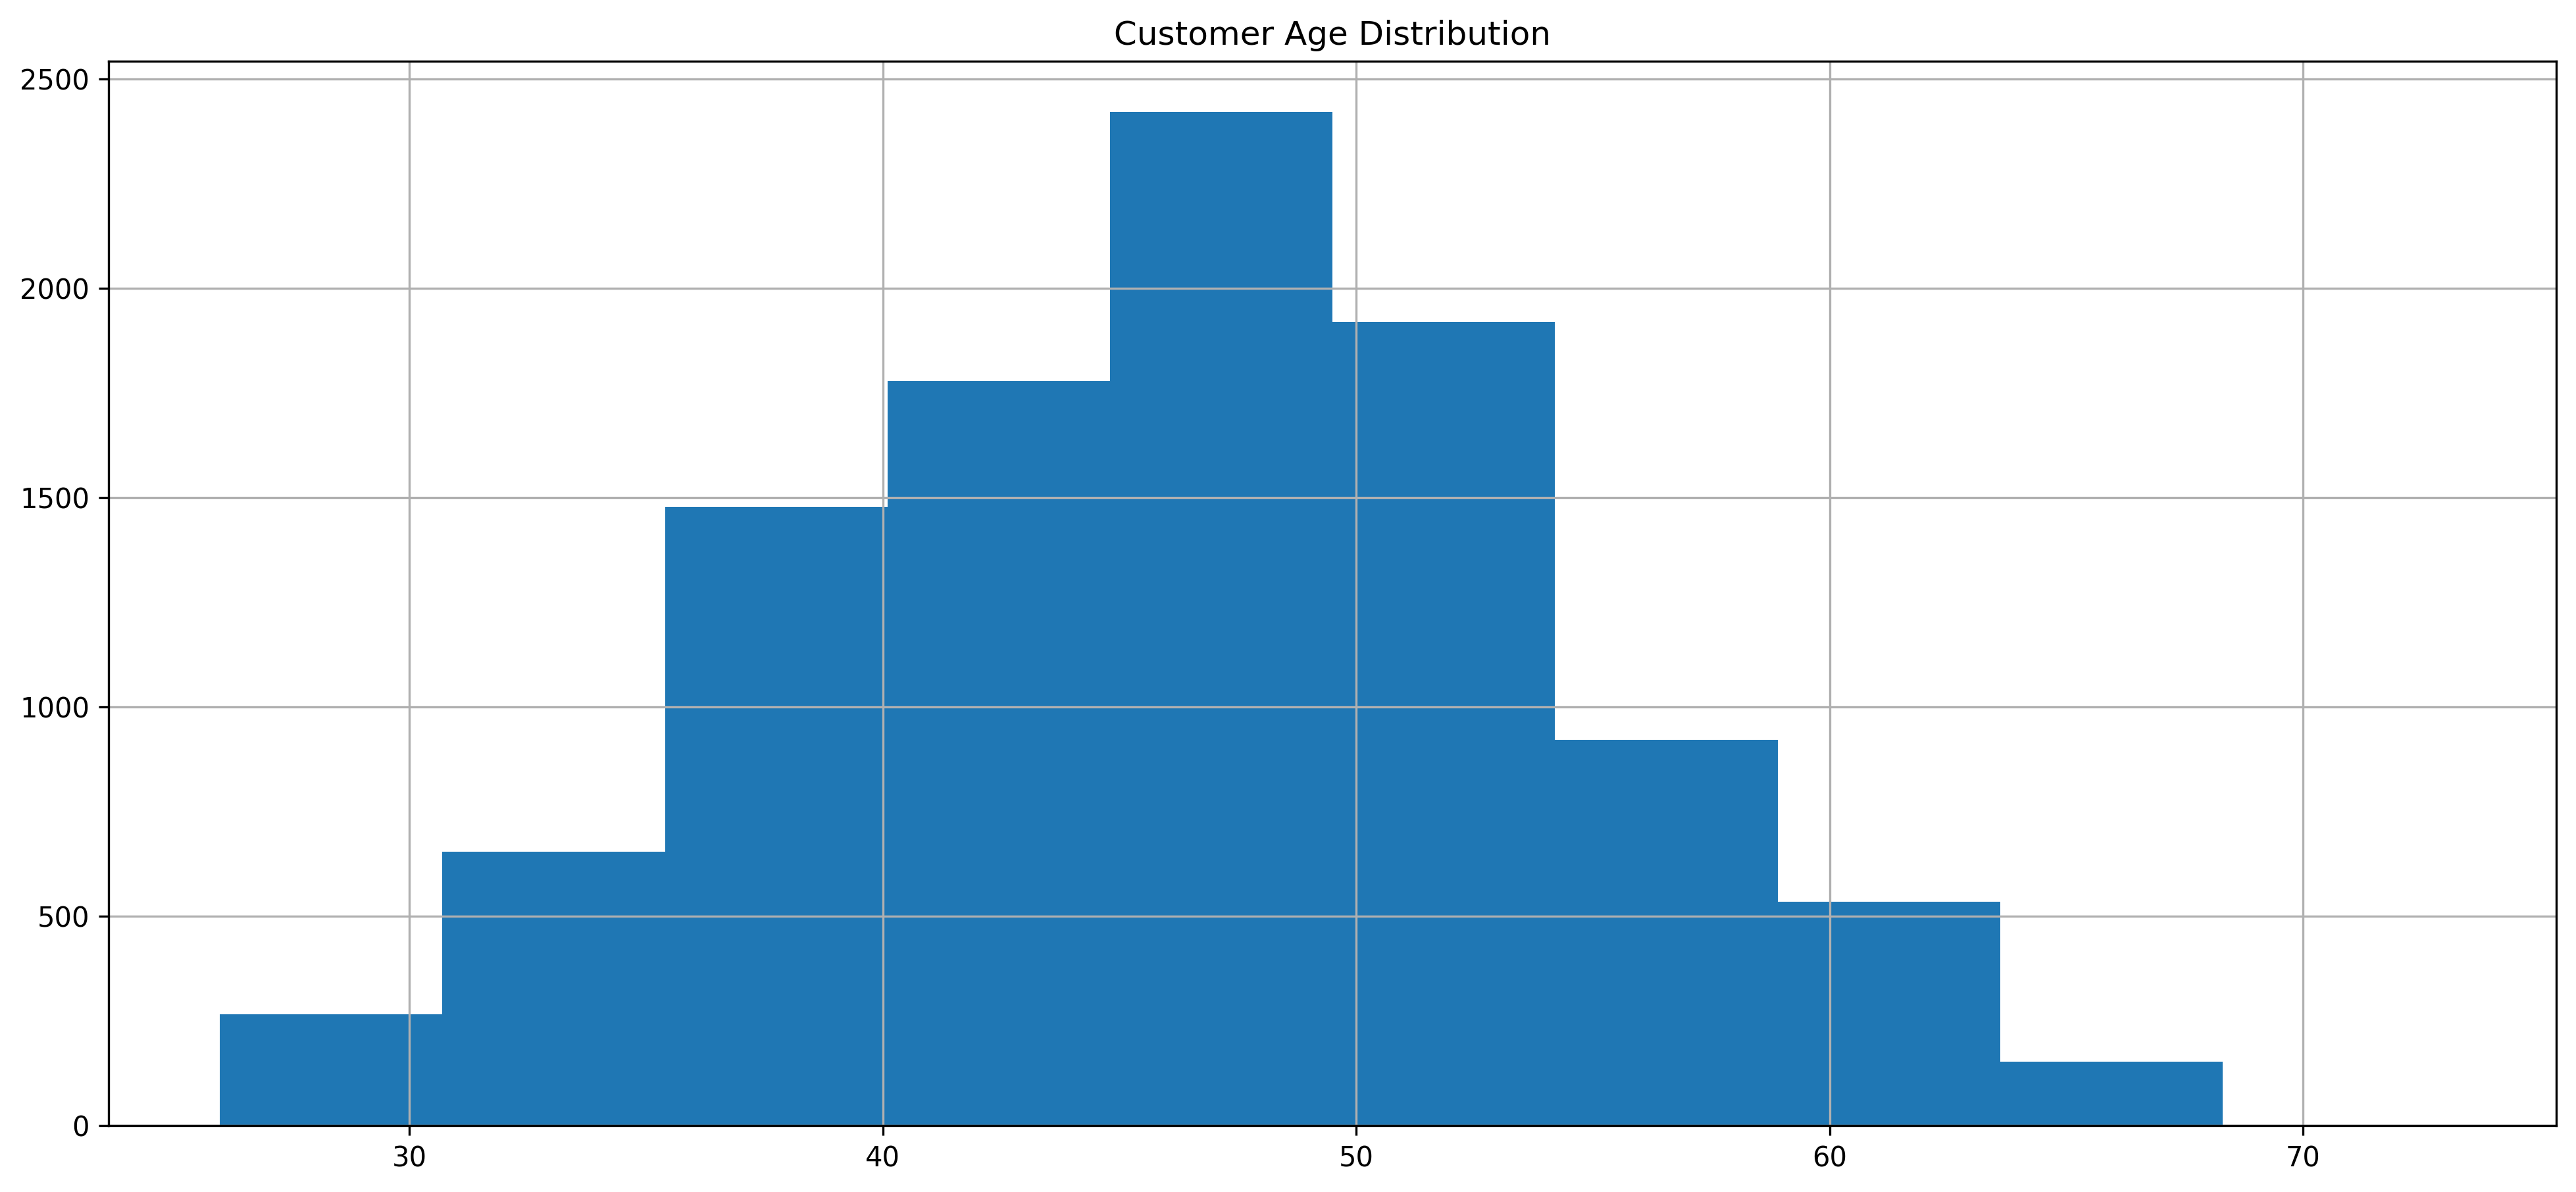

In [22]:
plt.figure(figsize=(16, 7), dpi=300)
plt.title('Customer Age Distribution')
df['Customer_Age'].hist()
plt.show()

### Feature selection

In [26]:
featureset = df[['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']]

1. Credit Limit on the Credit Card (Credit_Limit).
2. Open to Buy Credit Line (Average of last 12 months) (Avg_Open_To_Buy).
3. Demographic variable - Customer's Age in Years (Customer_Age).
4. Total no. of products held by the customer (Total_Relationship_Count).
5. No. of months inactive in the last 12 months (Months_Inactive_12_mon).
6. Period of relationship with bank (Months_on_book).

### Normalization

In [28]:
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

In [29]:
feature_mtx

array([[0.34018992, 0.34511633, 0.40425532, 0.8       , 0.16666667,
        0.60465116],
       [0.20611167, 0.21409324, 0.4893617 , 1.        , 0.16666667,
        0.72093023],
       [0.05984999, 0.09894822, 0.53191489, 0.6       , 0.16666667,
        0.53488372],
       ...,
       [0.1200416 , 0.15663663, 0.38297872, 0.8       , 0.5       ,
        0.53488372],
       [0.11617192, 0.15292788, 0.08510638, 0.6       , 0.5       ,
        0.53488372],
       [0.27056597, 0.24408194, 0.36170213, 1.        , 0.33333333,
        0.27906977]])

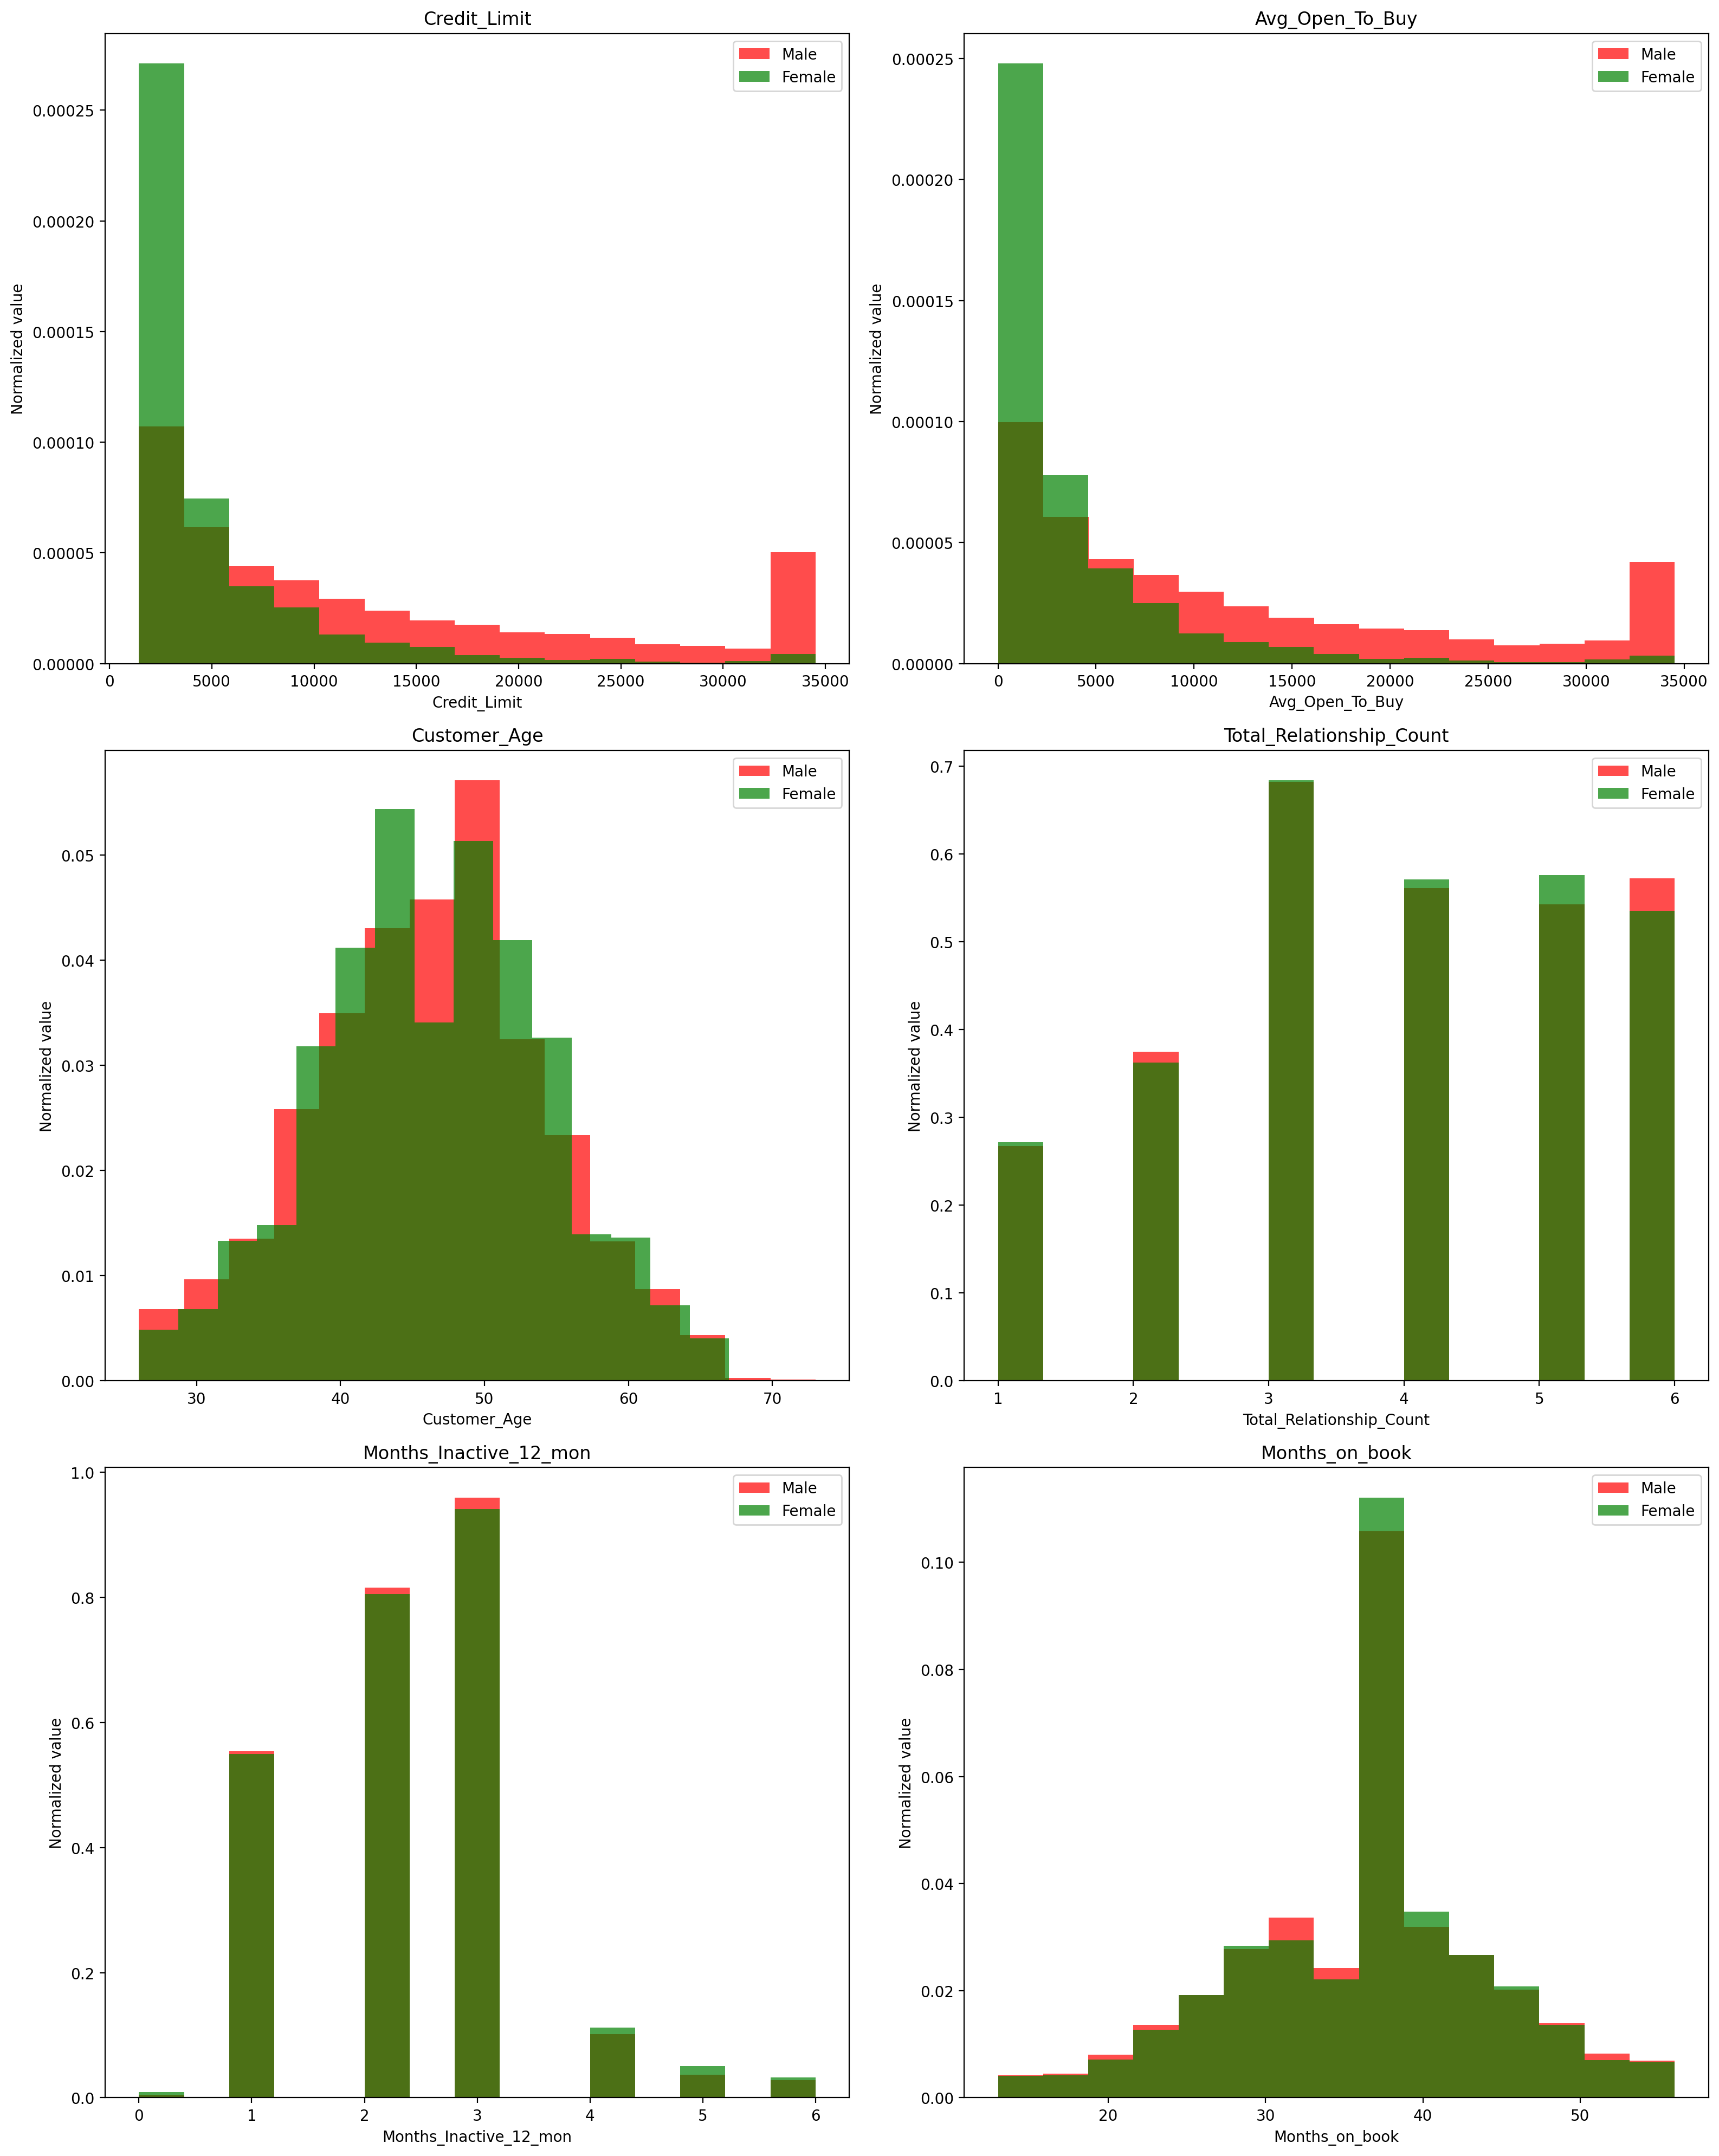

In [30]:
desired_columns = ['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age',
                   'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']

fig, axs = plt.subplots(3, 2, figsize=(16, 20), dpi=200)

for i, ax in enumerate(axs.flatten()):
    label = desired_columns[i]
    ax.hist(df[df['Gender'] == 'M'][label], color='red', label="Male",
            alpha=0.7, density=True, bins=15)
    ax.hist(df[df['Gender'] == 'F'][label], color='green', label="Female",
            alpha=0.7, density=True, bins=15)
    ax.set_title(label)
    ax.set_ylabel("Normalized value")
    ax.set_xlabel(label)
    ax.legend()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.30969008 0.44760884 ... 0.44768424 0.58732879 0.4366317 ]
 [0.30969008 0.         0.48070254 ... 0.45579718 0.69352515 0.49433702]
 [0.44760884 0.48070254 0.         ... 0.42455162 0.56288091 0.58962358]
 ...
 [0.44768424 0.45579718 0.42455162 ... 0.         0.35882678 0.40493891]
 [0.58732879 0.69352515 0.56288091 ... 0.35882678 0.         0.6015566 ]
 [0.4366317  0.49433702 0.58962358 ... 0.40493891 0.6015566  0.        ]]


In [32]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [33]:
Z_using_dist_matrix

array([[3.34300000e+03, 5.73500000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.99600000e+03, 8.04500000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.27200000e+03, 6.08200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.02380000e+04, 2.02390000e+04, 6.17784302e+01, 9.01000000e+02],
       [2.02460000e+04, 2.02490000e+04, 6.66677257e+01, 9.22600000e+03],
       [2.02500000e+04, 2.02510000e+04, 1.08054530e+02, 1.01270000e+04]])

1. Definition:

  - A dendrogram is a tree-like diagram used in hierarchical clustering analysis.

2. Purpose:

  - It illustrates the arrangement and grouping of data points based on similarity or dissimilarity.

3. Structure:

  - Leaves or terminal nodes represent individual data points or samples.

  - Branches and internal nodes show how data points or clusters merge.

4. Branch Height:

  - The height/length of a branch indicates the degree of dissimilarity.

  - Longer branches mean greater dissimilarity between clusters or points.

5. Clustering Process:

  - Begins with each data point as its own cluster.

  - Gradually merges clusters based on similarity or distance.

  - Ends with all data points combined into one cluster at the top (root).

6. Cluster Determination:

  - Helps identify the optimal number of clusters by examining the merging heights.

  - A large jump in branch height suggests a natural cutoff point for cluster selection.

7. Applications Beyond Clustering:

  - Also used in biology, taxonomy, and data visualization to show hierarchical relationships.

8. Interpretation:

  - Provides a clear and informative visual summary of how clusters are formed.

  - Aids in understanding complex data structures through visual analysis.


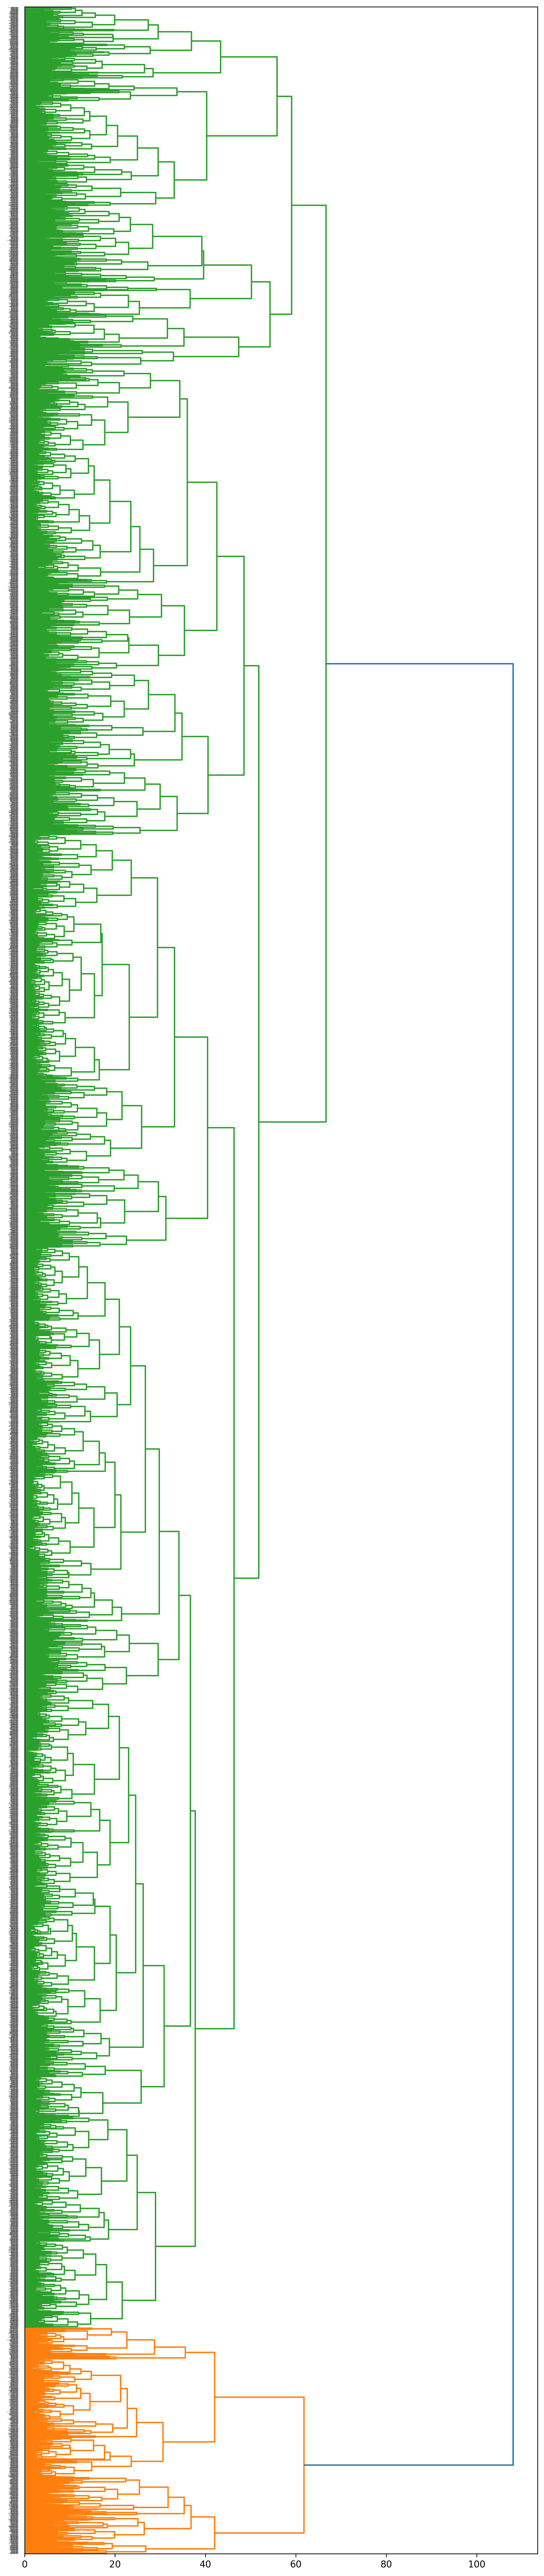

In [34]:
import scipy
import pylab

fig = pylab.figure(figsize=(10, 50), dpi=300)
def llf(id):
    return '[%s %s]' % (df['Education_Level'][id], df['Card_Category'][id])

dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=1, orientation = 'right')

#### Using AgglomerativeClustering from scikit-learn:

- Clustering Tool:

  - Use the AgglomerativeClustering function from the scikit-learn library to perform hierarchical clustering.

- Clustering Approach:

  - It uses a bottom-up approach, where each data point starts as its own cluster, and clusters are merged iteratively.

- Linkage Criteria:

  - The linkage method defines how the distance between clusters is calculated during merging.

- Ward Linkage:

  - Minimizes the sum of squared differences within all clusters.

  - Similar to the k-means objective function but used in a hierarchical manner.

  - It is a variance-minimizing method.

- Complete (Maximum) Linkage:

  - Minimizes the maximum distance between observations of pairs of clusters.

- Average Linkage:

  - Minimizes the average distance between all pairs of observations across clusters.


In [35]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(dist_matrix)

agglom.labels_

array([2, 2, 2, ..., 2, 2, 5])

In [36]:
df['cluster_'] = agglom.labels_ #new field to our dataframe to show the cluster of each row
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  cluster_  
0                  0.061         2  
1                  0.105         2  
2                  0.000         2  
3                  0.760         2  
4                  0.000         5  

[5 rows x 21 columns]

In [38]:
df.shape

(10127, 21)

Text(0, 0.5, 'Customer Age')

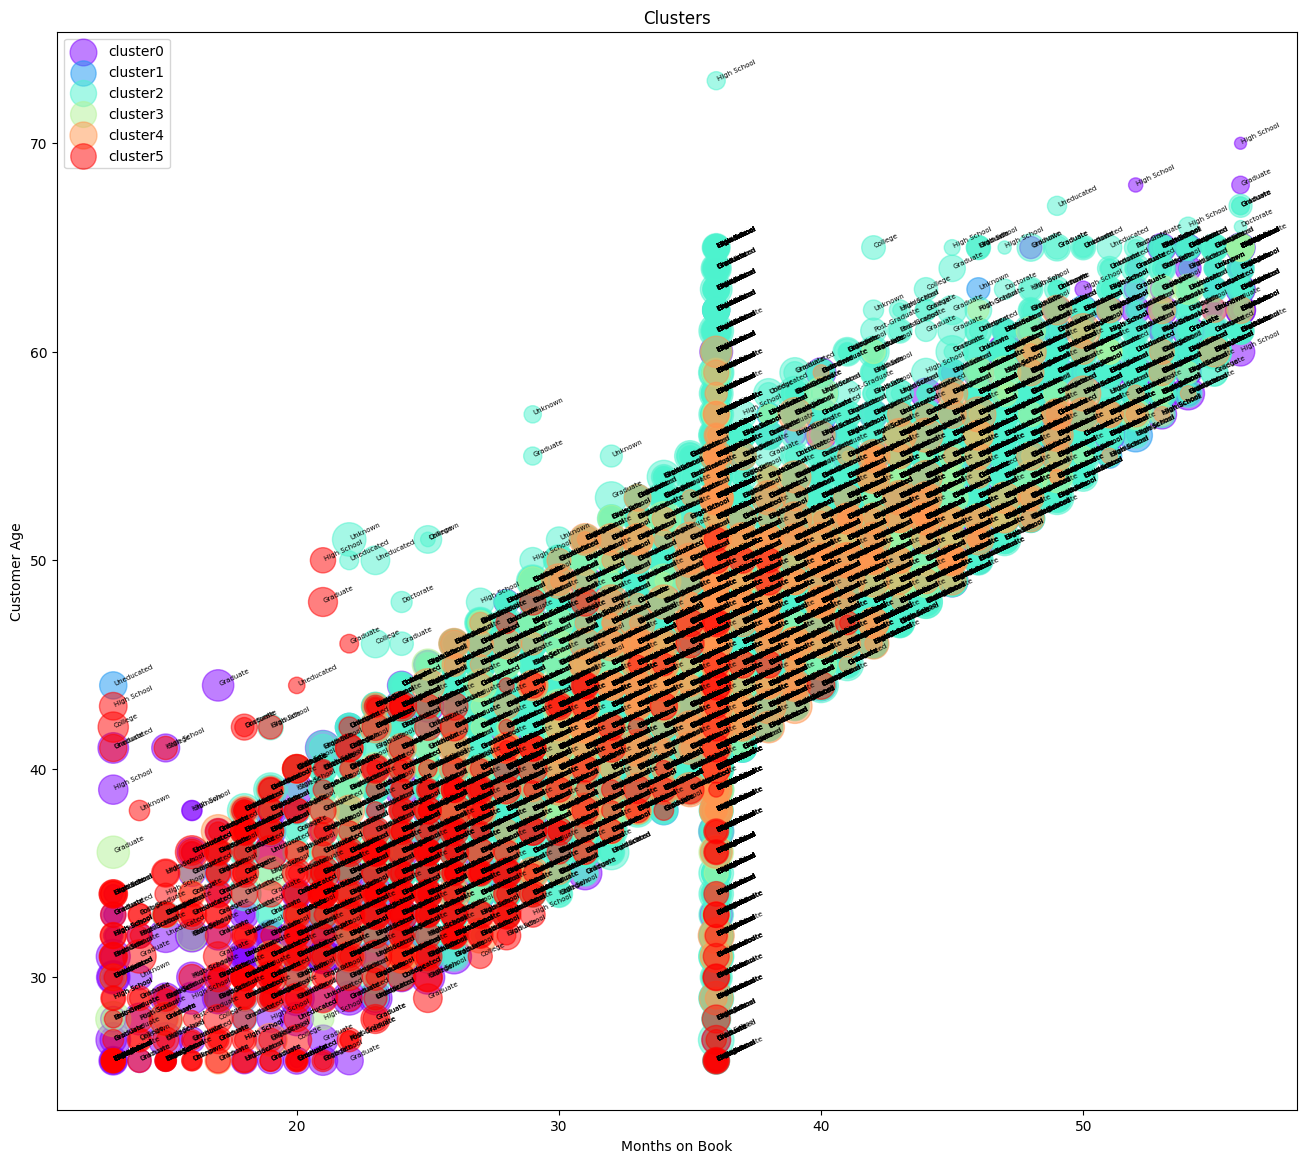

In [39]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.Months_on_book[i], subset.Customer_Age[i], str(subset['Education_Level'][i]), rotation=25, fontsize=5)
    plt.scatter(subset.Months_on_book, subset.Customer_Age, s=subset.Total_Trans_Ct*5, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Months on Book')
plt.ylabel('Customer Age')

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns = ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category']

for column in columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = encoder.fit_transform(df[column])
        print(f"Column: {column}")
        for category, value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
            print(f"Category: {category}, Encoded Value: {value}")
        print("-" * 50)

Column: Attrition_Flag
Category: Attrited Customer, Encoded Value: 0
Category: Existing Customer, Encoded Value: 1
--------------------------------------------------
Column: Education_Level
Category: College, Encoded Value: 0
Category: Doctorate, Encoded Value: 1
Category: Graduate, Encoded Value: 2
Category: High School, Encoded Value: 3
Category: Post-Graduate, Encoded Value: 4
Category: Uneducated, Encoded Value: 5
Category: Unknown, Encoded Value: 6
--------------------------------------------------
Column: Marital_Status
Category: Divorced, Encoded Value: 0
Category: Married, Encoded Value: 1
Category: Single, Encoded Value: 2
Category: Unknown, Encoded Value: 3
--------------------------------------------------
Column: Income_Category
Category: $120K +, Encoded Value: 0
Category: $40K - $60K, Encoded Value: 1
Category: $60K - $80K, Encoded Value: 2
Category: $80K - $120K, Encoded Value: 3
Category: Less than $40K, Encoded Value: 4
Category: Unknown, Encoded Value: 5
-------------

In [46]:
param = 'Education_Level' #@param ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category']

agg_card = df.groupby(['cluster_', param])[['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age',
                   'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']].mean()
agg_card

Credit_Limit  Avg_Open_To_Buy  Customer_Age  \
cluster_ Education_Level                                                
0        0                12776.198333     11697.265000     47.616667   
         1                15148.937037     14023.862963     48.777778   
         2                11311.432609     10189.405435     48.478261   
         3                12108.608943     10888.869106     46.032520   
         4                11292.400000     10288.400000     43.763158   
         5                11985.046392     10846.963918     46.979381   
         6                10920.223009      9683.718584     46.044248   
1        0                19889.956522     18795.695652     45.826087   
         1                20394.416667     18966.666667     49.000000   
         2                19646.136364     18569.329545     45.522727   
         3                19490.595745     18331.255319     46.787234   
         4                19884.750000     18675.687500     44.437500   
         5                20720.156863     19503.490196     47.784314   
         6                20152.551020     18914.346939     48.000000   
2        0                 5323.707881      4176.480491     46.612403   
         1                 5222.336639      4155.116253     47.484848   
         2                 5494.850620      4328.674174     46.966942   
         3                 5532.297761      4335.149968     47.081254   
         4                 5517.783854      4339.424479     46.648438   
         5                 5616.688380      4461.767606     47.027289   
         6                 5205.128794      4066.612749     47.269731   
3        0                27740.647059     26578.676471     46.852941   
         1                29306.769231     27932.461538     48.615385   
         2                28042.235294     26863.011765     45.352941   
         3                27860.705882     26808.852941     46.117647   
         4                28052.882353     26933.823529     47.470588   
         5                27938.204545     26755.159091     48.000000   
         6                27245.695652     26118.260870     45.239130   
4        0                34329.406250     33261.265625     46.671875   
         1                34324.478261     33029.000000     46.260870   
         2                34197.677249     33034.296296     46.899471   
         3                34259.855856     33016.504505     47.036036   
         4                34380.516129     33016.806452     46.419355   
         5                34219.617978     33110.168539     45.539326   
         6                34232.172414     32894.850575     44.988506   
5        0                 5389.315517      4271.677586     34.465517   
         1                 5728.176923      4892.869231     36.692308   
         2                 5185.867901      3997.886420     34.537037   
         3                 5680.717822      4502.143564     34.524752   
         4                 5476.333333      4091.200000     32.566667   
         5                 5127.248571      3971.720000     35.000000   
         6                 6261.519718      5114.928169     34.830986   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
cluster_ Education_Level                                                     
0        0                                2.700000                2.483333   
         1                                2.814815                2.481481   
         2                                2.652174                2.641304   
         3                                2.585366                2.544715   
         4                                2.421053                2.552632   
         5                                2.618557                2.515464   
         6                                2.699115                2.433628   
1        0                                5.521739                2.260870   
         1                       